In [25]:
!pip install gdown
file_url = "https://drive.google.com/uc?id=180FkupJQe0Oiq0A1yJg4m5Ggbfw-G8Sc"
!gdown {file_url} -O data.npy

import numpy as np

data = np.load("data.npy")
print(data)

Downloading...
From: https://drive.google.com/uc?id=180FkupJQe0Oiq0A1yJg4m5Ggbfw-G8Sc
To: /content/data.npy
100% 928/928 [00:00<00:00, 3.68MB/s]
[ 40.25196507  39.53010126  37.7992167   37.32837052  28.65394346
  29.69747547  26.10881978  27.83802602  22.99054421  25.80112967
  21.29795526  19.91155621  14.96131425  11.47430672  16.95134087
  13.78849326   9.82605161   6.51423783   7.28107882   4.71364215
   0.82726539   2.0547798    1.75589251   4.69110905  -3.1080814
   6.5508178    9.30439077  -5.9567694    2.87594962   3.1993877
  -2.70786354   2.15378132  -1.77644948  -5.11557224  -4.43062279
   6.25451526   1.9854139    7.74342429  -0.75124188   4.43658355
   2.96815869   1.56463746   0.77572103   6.78279848  -0.71535178
   2.83930294   0.35701732 -14.02823175   2.74610814  -8.92342079
  -5.25805964  -5.91984033 -11.23785323 -11.91938329  -4.2483209
  -0.19964379  -9.63227683 -13.30314598 -13.12628213  -7.21216734
  -6.38891745  -0.4667489   -8.21628152  -3.07657489 -19.52390961


In [26]:
data

array([ 40.25196507,  39.53010126,  37.7992167 ,  37.32837052,
        28.65394346,  29.69747547,  26.10881978,  27.83802602,
        22.99054421,  25.80112967,  21.29795526,  19.91155621,
        14.96131425,  11.47430672,  16.95134087,  13.78849326,
         9.82605161,   6.51423783,   7.28107882,   4.71364215,
         0.82726539,   2.0547798 ,   1.75589251,   4.69110905,
        -3.1080814 ,   6.5508178 ,   9.30439077,  -5.9567694 ,
         2.87594962,   3.1993877 ,  -2.70786354,   2.15378132,
        -1.77644948,  -5.11557224,  -4.43062279,   6.25451526,
         1.9854139 ,   7.74342429,  -0.75124188,   4.43658355,
         2.96815869,   1.56463746,   0.77572103,   6.78279848,
        -0.71535178,   2.83930294,   0.35701732, -14.02823175,
         2.74610814,  -8.92342079,  -5.25805964,  -5.91984033,
       -11.23785323, -11.91938329,  -4.2483209 ,  -0.19964379,
        -9.63227683, -13.30314598, -13.12628213,  -7.21216734,
        -6.38891745,  -0.4667489 ,  -8.21628152,  -3.07

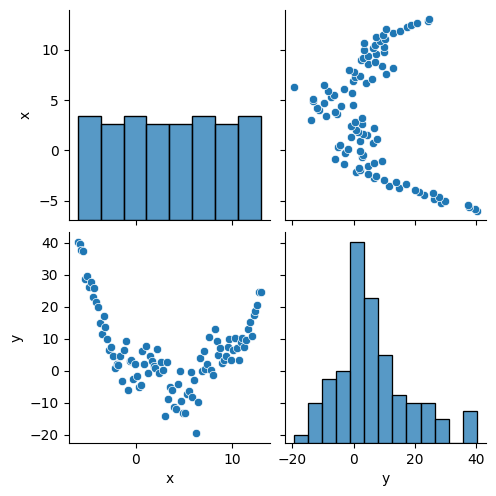

In [27]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

y_data = np.load("data.npy")
x_data = np.linspace(-6, 13, len(y_data))
data_df = pd.DataFrame({'x': x_data, 'y': y_data})

sns.pairplot(data_df)
plt.show()

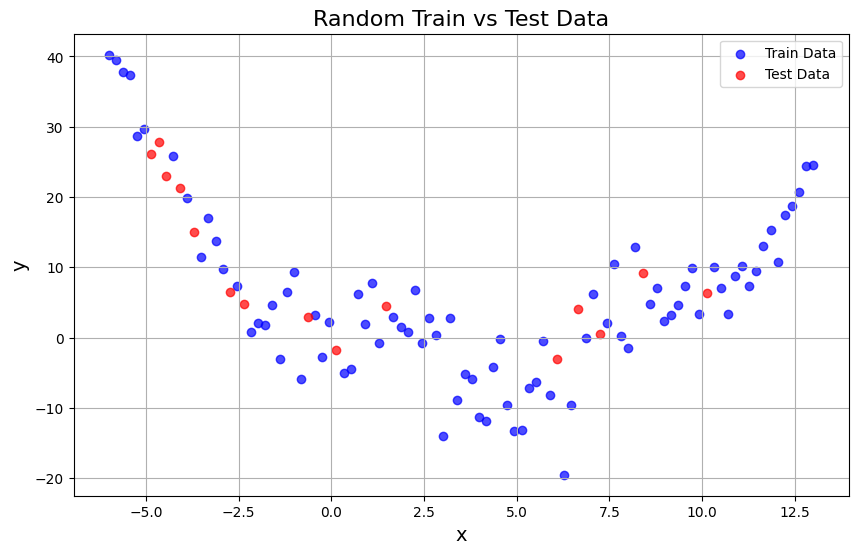

In [28]:
test_size = int(0.15 * len(data_df))
test_indices = np.random.choice(data_df.index, size=test_size, replace=False)
test_data = data_df.loc[test_indices]
train_data = data_df.drop(test_indices)

plt.figure(figsize=(10, 6))
plt.scatter(train_data['x'], train_data['y'], color='blue', label='Train Data', alpha=0.7)
plt.scatter(test_data['x'], test_data['y'], color='red', label='Test Data', alpha=0.7)

plt.title("Random Train vs Test Data", fontsize=16)
plt.xlabel("x", fontsize=14)
plt.ylabel("y", fontsize=14)
plt.legend()
plt.grid(True)
plt.show()

Scaled Weight (w): -0.19848095119853926
Scaled Bias (b): 5.2325153297885525e-17
Mean Squared Error (MSE): 81.19365909589503
Mean Absolute Error (MAE): 7.304100800036147
R-squared: 0.17147003701748842


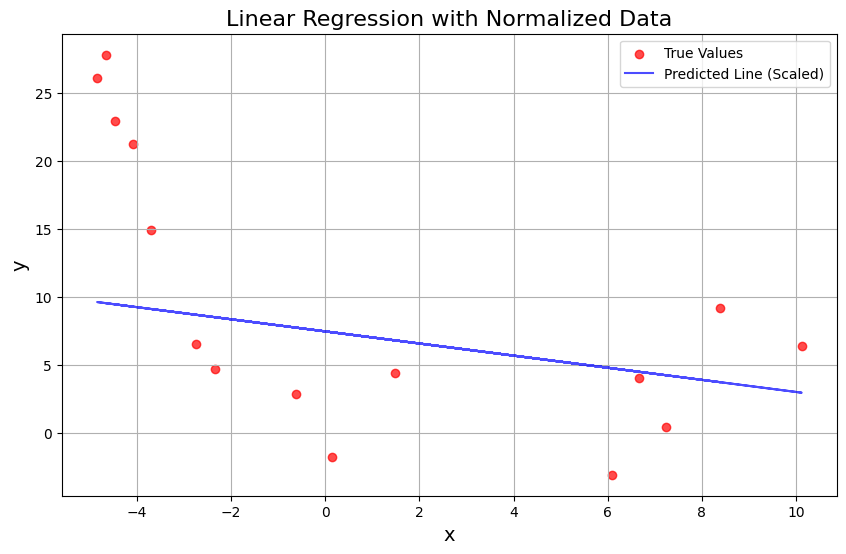

In [32]:
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import numpy as np
import matplotlib.pyplot as plt

x_train = train_data['x'].values
y_train = train_data['y'].values
x_test = test_data['x'].values
y_test = test_data['y'].values
scaler_x = StandardScaler()
scaler_y = StandardScaler()

x_train_scaled = scaler_x.fit_transform(x_train.reshape(-1, 1)).flatten()
y_train_scaled = scaler_y.fit_transform(y_train.reshape(-1, 1)).flatten()
x_test_scaled = scaler_x.transform(x_test.reshape(-1, 1)).flatten()
y_test_scaled = scaler_y.transform(y_test.reshape(-1, 1)).flatten()

x_mean_scaled = np.mean(x_train_scaled)
y_mean_scaled = np.mean(y_train_scaled)
numerator = np.sum((x_train_scaled - x_mean_scaled) * (y_train_scaled - y_mean_scaled))
denominator = np.sum((x_train_scaled - x_mean_scaled) ** 2)
w_scaled = numerator / denominator
b_scaled = y_mean_scaled - w_scaled * x_mean_scaled
print(f"Scaled Weight (w): {w_scaled}")
print(f"Scaled Bias (b): {b_scaled}")

x_test_scaled = scaler_x.transform(x_test.reshape(-1, 1)).flatten()
y_pred_scaled = w_scaled * x_test_scaled + b_scaled
y_pred = scaler_y.inverse_transform(y_pred_scaled.reshape(-1, 1)).flatten()

mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Mean Squared Error (MSE): {mse}")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"R-squared: {r2}")

plt.figure(figsize=(10, 6))
plt.scatter(x_test, y_test, color='red', label='True Values', alpha=0.7)
plt.plot(x_test, y_pred, color='blue', label='Predicted Line (Scaled)', alpha=0.7)
plt.title("Linear Regression with Normalized Data", fontsize=16)
plt.xlabel("x", fontsize=14)
plt.ylabel("y", fontsize=14)
plt.legend()
plt.grid(True)
plt.show()


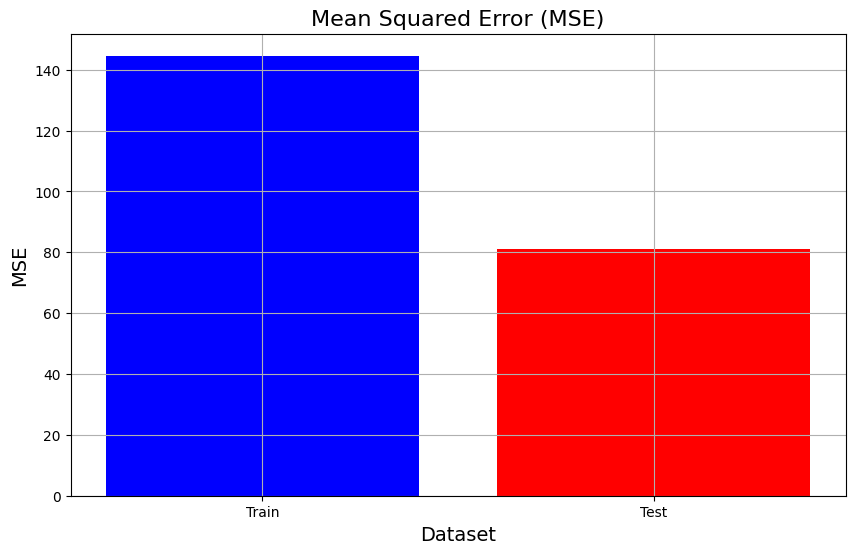

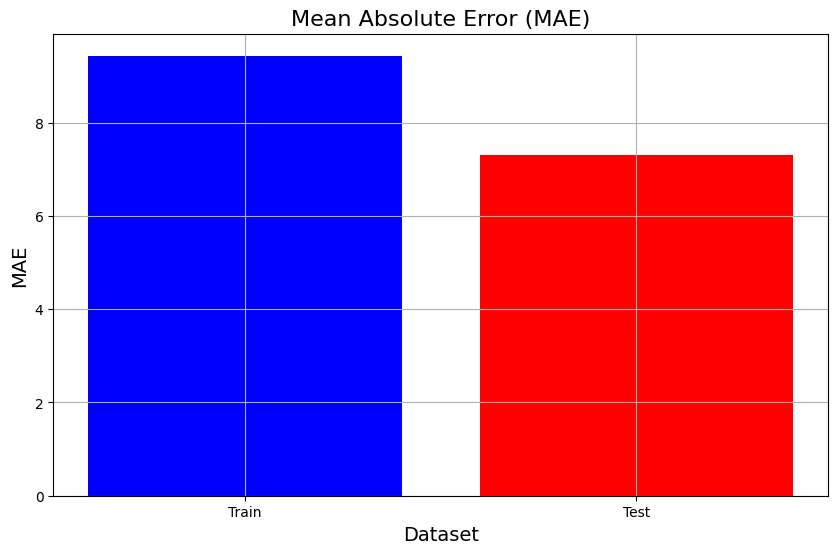

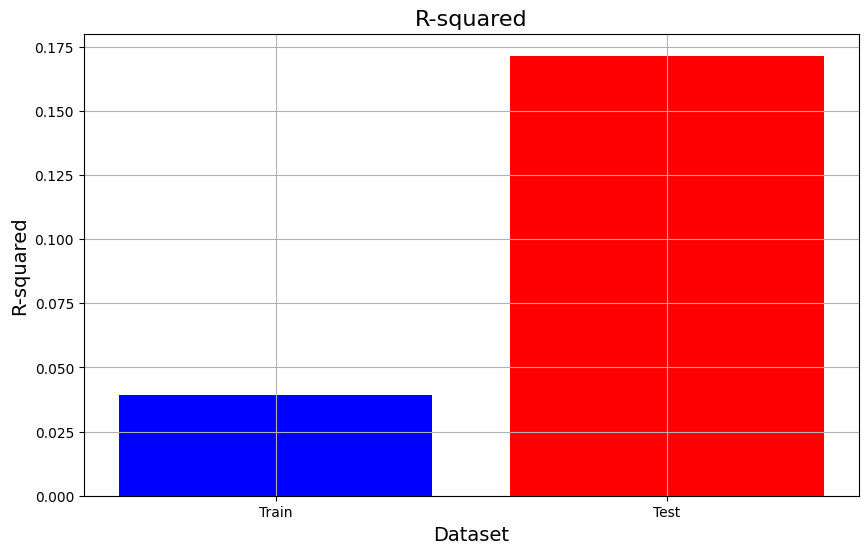

In [37]:
y_train_pred_scaled = w_scaled * x_train_scaled + b_scaled
y_train_pred = scaler_y.inverse_transform(y_train_pred_scaled.reshape(-1, 1)).flatten()

train_mse = mean_squared_error(y_train, y_train_pred)
train_mae = mean_absolute_error(y_train, y_train_pred)
train_r2 = r2_score(y_train, y_train_pred)

y_test_pred_scaled = w_scaled * x_test_scaled + b_scaled
y_test_pred = scaler_y.inverse_transform(y_test_pred_scaled.reshape(-1, 1)).flatten()

test_mse = mean_squared_error(y_test, y_test_pred)
test_mae = mean_absolute_error(y_test, y_test_pred)
test_r2 = r2_score(y_test, y_test_pred)

plt.figure(figsize=(10, 6))
plt.bar(['Train', 'Test'], [train_mse, test_mse], color=['blue', 'red'])
plt.title('Mean Squared Error (MSE)', fontsize=16)
plt.ylabel('MSE', fontsize=14)
plt.xlabel('Dataset', fontsize=14)
plt.grid(True)
plt.show()

plt.figure(figsize=(10, 6))
plt.bar(['Train', 'Test'], [train_mae, test_mae], color=['blue', 'red'])
plt.title('Mean Absolute Error (MAE)', fontsize=16)
plt.ylabel('MAE', fontsize=14)
plt.xlabel('Dataset', fontsize=14)
plt.grid(True)
plt.show()

plt.figure(figsize=(10, 6))
plt.bar(['Train', 'Test'], [train_r2, test_r2], color=['blue', 'red'])
plt.title('R-squared', fontsize=16)
plt.ylabel('R-squared', fontsize=14)
plt.xlabel('Dataset', fontsize=14)
plt.grid(True)
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


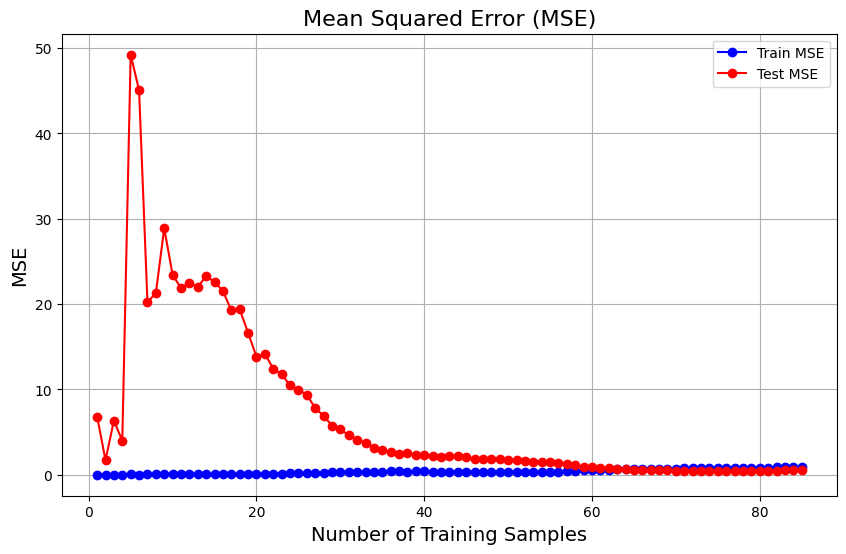

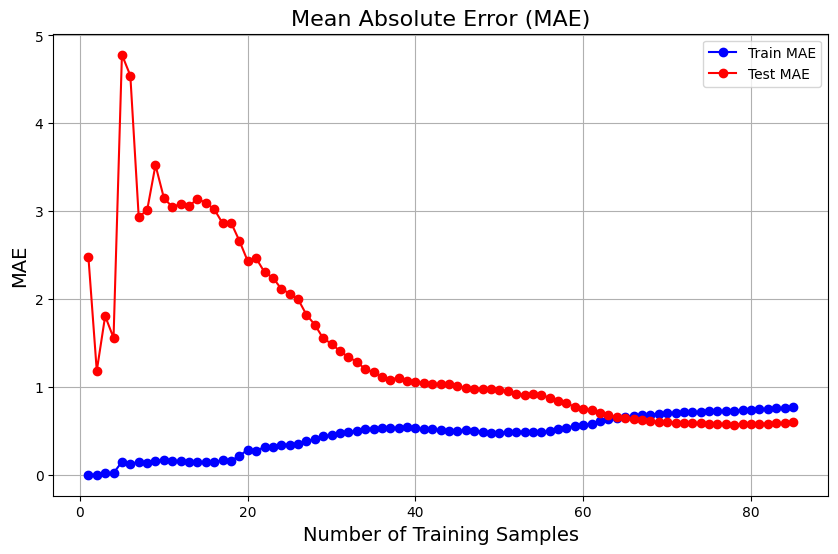

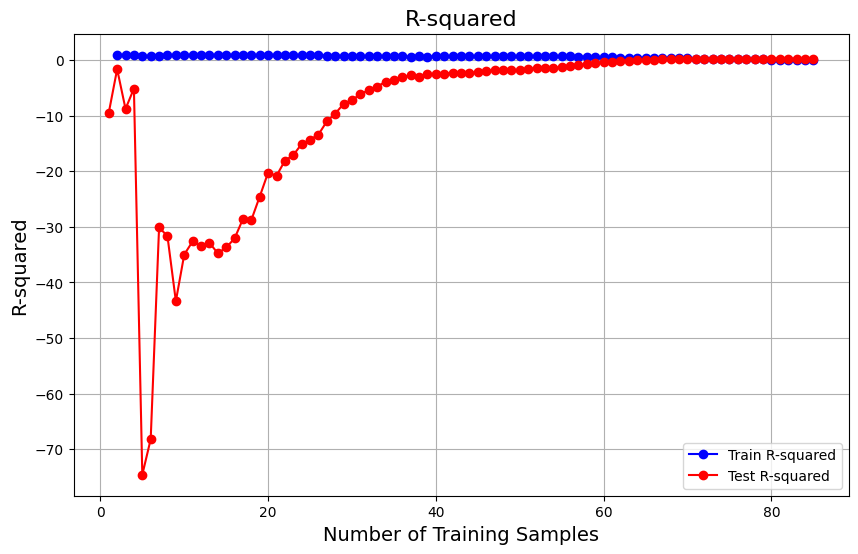

In [36]:
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

train_sizes = []
train_mse = []
train_mae = []
train_r2 = []

test_mse = []
test_mae = []
test_r2 = []

for i in range(1, len(x_train_scaled) + 1):
    x_train_subset = x_train_scaled[:i].reshape(-1, 1)
    y_train_subset = y_train_scaled[:i]

    model.fit(x_train_subset, y_train_subset)

    y_train_subset_pred = model.predict(x_train_subset)
    train_mse.append(mean_squared_error(y_train_subset, y_train_subset_pred))
    train_mae.append(mean_absolute_error(y_train_subset, y_train_subset_pred))
    train_r2.append(r2_score(y_train_subset, y_train_subset_pred))

    y_test_pred_scaled = model.predict(x_test_scaled.reshape(-1, 1))
    test_mse.append(mean_squared_error(y_test_scaled, y_test_pred_scaled))
    test_mae.append(mean_absolute_error(y_test_scaled, y_test_pred_scaled))
    test_r2.append(r2_score(y_test_scaled, y_test_pred_scaled))

    train_sizes.append(i)

plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_mse, label='Train MSE', color='blue', marker='o')
plt.plot(train_sizes, test_mse, label='Test MSE', color='red', marker='o')
plt.title('Mean Squared Error (MSE)', fontsize=16)
plt.xlabel('Number of Training Samples', fontsize=14)
plt.ylabel('MSE', fontsize=14)
plt.legend()
plt.grid(True)
plt.show()

plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_mae, label='Train MAE', color='blue', marker='o')
plt.plot(train_sizes, test_mae, label='Test MAE', color='red', marker='o')
plt.title('Mean Absolute Error (MAE)', fontsize=16)
plt.xlabel('Number of Training Samples', fontsize=14)
plt.ylabel('MAE', fontsize=14)
plt.legend()
plt.grid(True)
plt.show()

plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_r2, label='Train R-squared', color='blue', marker='o')
plt.plot(train_sizes, test_r2, label='Test R-squared', color='red', marker='o')
plt.title('R-squared', fontsize=16)
plt.xlabel('Number of Training Samples', fontsize=14)
plt.ylabel('R-squared', fontsize=14)
plt.legend()
plt.grid(True)
plt.show()

Degree 1: Train MSE = 144.6049, Test MSE = 81.1937


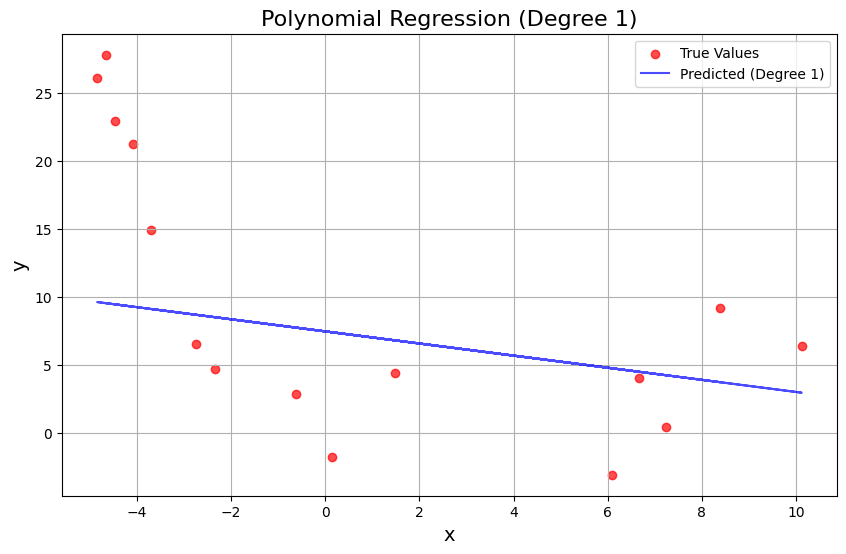

Degree 2: Train MSE = 29.8548, Test MSE = 21.3176


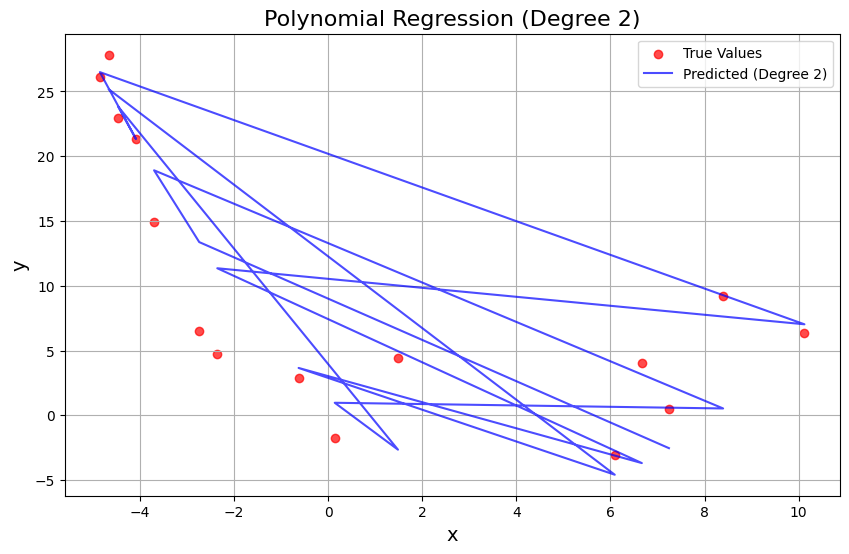

Degree 3: Train MSE = 28.1371, Test MSE = 16.5219


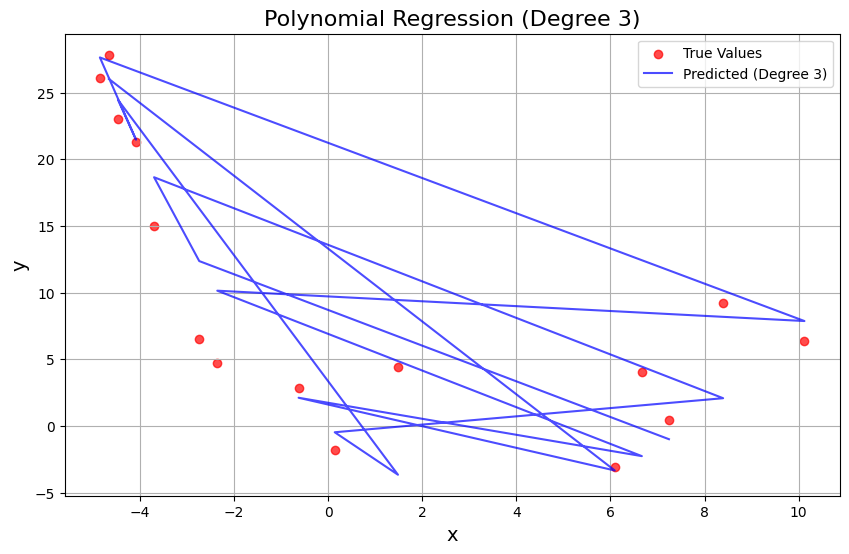

Degree 4: Train MSE = 26.6587, Test MSE = 14.2195


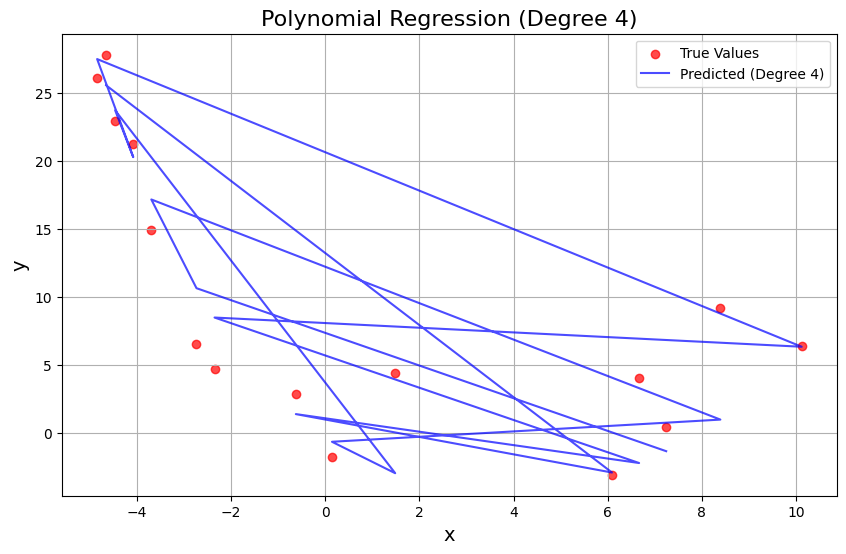

Degree 5: Train MSE = 26.0494, Test MSE = 14.4859


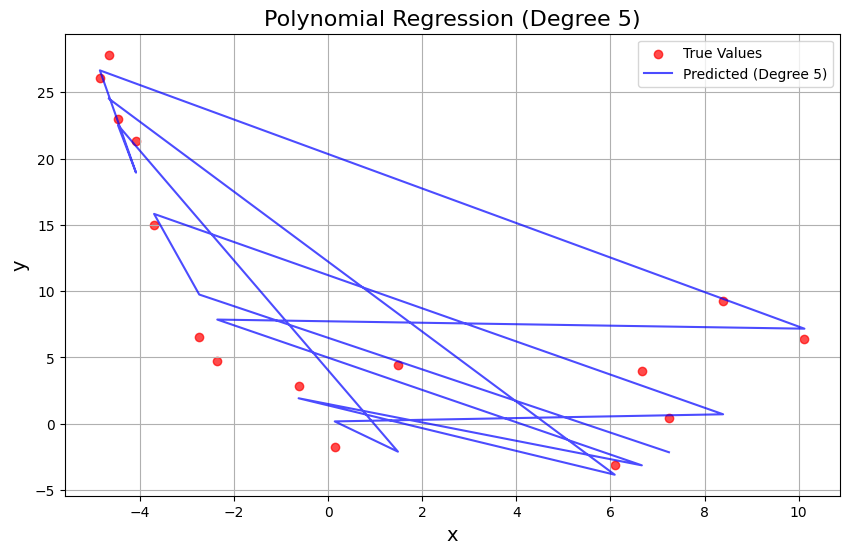

Degree 6: Train MSE = 25.3772, Test MSE = 14.7272


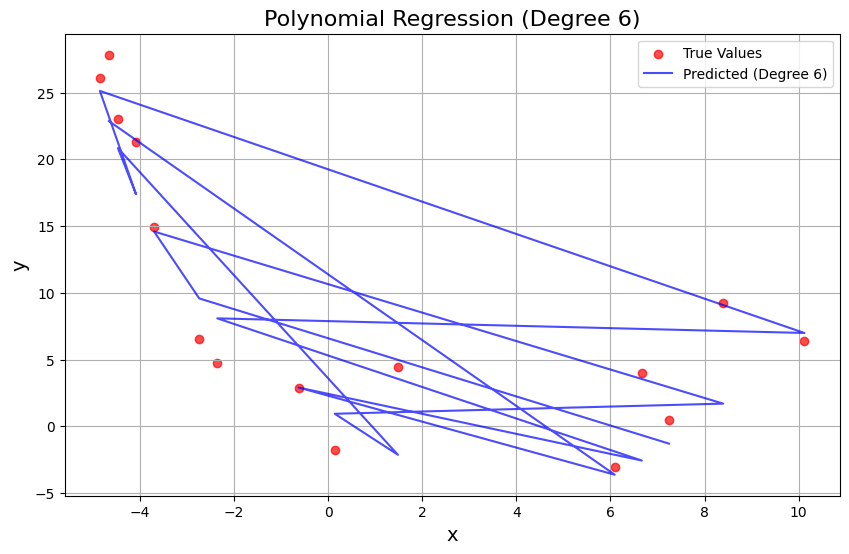

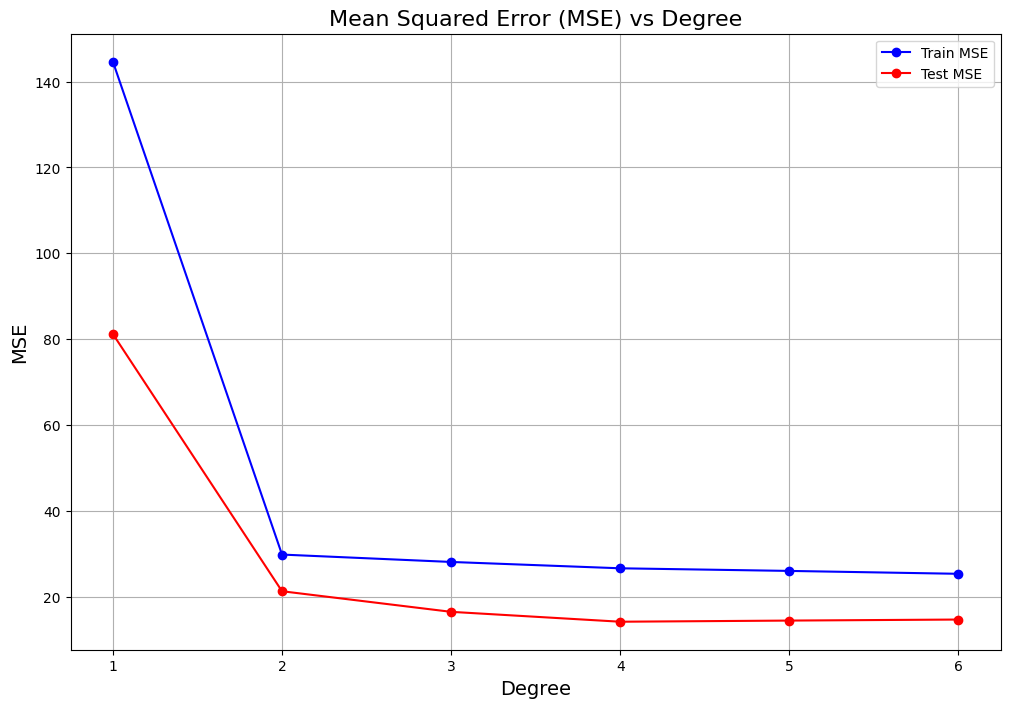

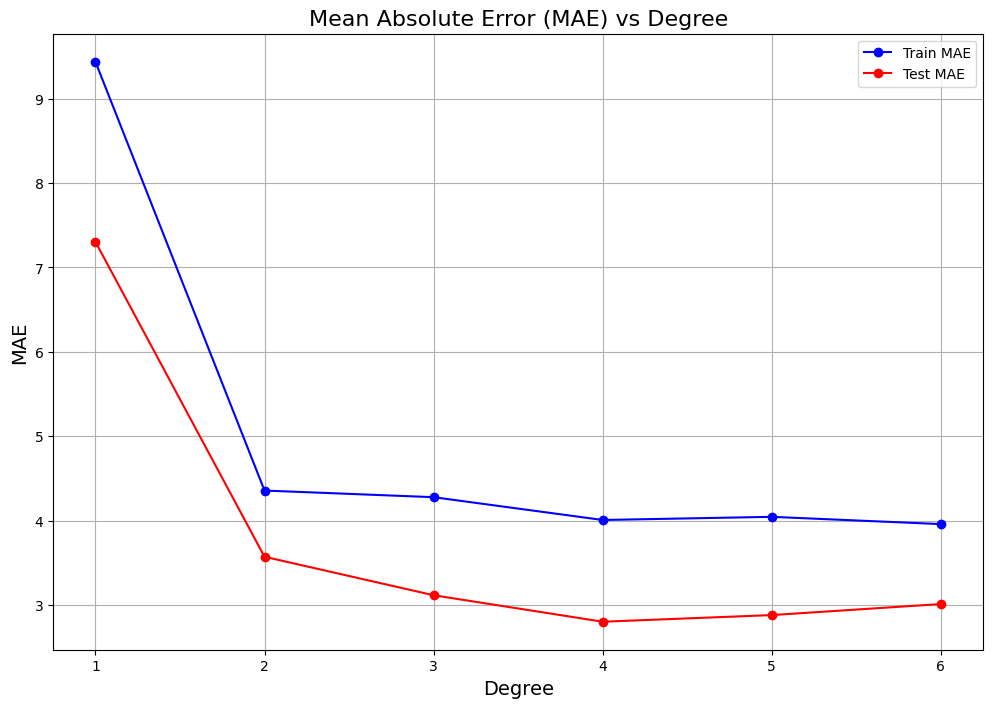

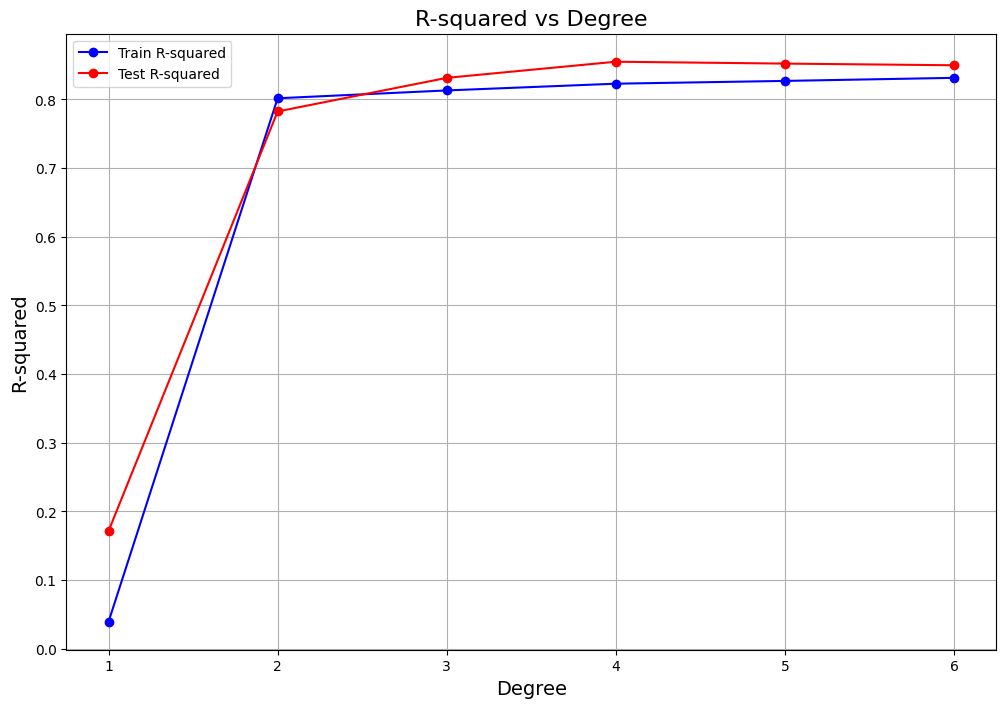

In [45]:
max_degree = 6
train_mse_list = []
test_mse_list = []
train_mae_list = []
test_mae_list = []
train_r2_list = []
test_r2_list = []

for degree in range(1, max_degree + 1):
    X_poly_train = np.column_stack([x_train_scaled ** i for i in range(1, degree + 1)])
    X_poly_test = np.column_stack([x_test_scaled ** i for i in range(1, degree + 1)])

    X_mean = np.mean(X_poly_train, axis=0)
    Y_mean = np.mean(y_train_scaled)
    X_centered = X_poly_train - X_mean
    Y_centered = y_train_scaled - Y_mean

    w = np.linalg.inv(X_centered.T @ X_centered) @ X_centered.T @ Y_centered
    b = Y_mean - np.sum(w * X_mean)

    y_train_pred_scaled = X_poly_train @ w + b
    y_test_pred_scaled = X_poly_test @ w + b
    y_train_pred = scaler_y.inverse_transform(y_train_pred_scaled.reshape(-1, 1)).flatten()
    y_test_pred = scaler_y.inverse_transform(y_test_pred_scaled.reshape(-1, 1)).flatten()

    train_mse = mean_squared_error(y_train, y_train_pred)
    test_mse = mean_squared_error(y_test, y_test_pred)
    train_mae = mean_absolute_error(y_train, y_train_pred)
    test_mae = mean_absolute_error(y_test, y_test_pred)
    train_r2 = r2_score(y_train, y_train_pred)
    test_r2 = r2_score(y_test, y_test_pred)

    train_mse_list.append(train_mse)
    test_mse_list.append(test_mse)
    train_mae_list.append(train_mae)
    test_mae_list.append(test_mae)
    train_r2_list.append(train_r2)
    test_r2_list.append(test_r2)

    print(f"Degree {degree}: Train MSE = {train_mse:.4f}, Test MSE = {test_mse:.4f}")

    plt.figure(figsize=(10, 6))
    plt.scatter(x_test, y_test, color='red', label='True Values', alpha=0.7)
    plt.plot(x_test, y_test_pred, label=f'Predicted (Degree {degree})', color='blue', alpha=0.7)
    plt.title(f'Polynomial Regression (Degree {degree})', fontsize=16)
    plt.xlabel("x", fontsize=14)
    plt.ylabel("y", fontsize=14)
    plt.legend()
    plt.grid(True)
    plt.show()

degrees = list(range(1, max_degree + 1))

plt.figure(figsize=(12, 8))
plt.plot(degrees, train_mse_list, label='Train MSE', marker='o', color='blue')
plt.plot(degrees, test_mse_list, label='Test MSE', marker='o', color='red')
plt.title("Mean Squared Error (MSE) vs Degree", fontsize=16)
plt.xlabel("Degree", fontsize=14)
plt.ylabel("MSE", fontsize=14)
plt.legend()
plt.grid(True)
plt.show()

plt.figure(figsize=(12, 8))
plt.plot(degrees, train_mae_list, label='Train MAE', marker='o', color='blue')
plt.plot(degrees, test_mae_list, label='Test MAE', marker='o', color='red')
plt.title("Mean Absolute Error (MAE) vs Degree", fontsize=16)
plt.xlabel("Degree", fontsize=14)
plt.ylabel("MAE", fontsize=14)
plt.legend()
plt.grid(True)
plt.show()

plt.figure(figsize=(12, 8))
plt.plot(degrees, train_r2_list, label='Train R-squared', marker='o', color='blue')
plt.plot(degrees, test_r2_list, label='Test R-squared', marker='o', color='red')
plt.title("R-squared vs Degree", fontsize=16)
plt.xlabel("Degree", fontsize=14)
plt.ylabel("R-squared", fontsize=14)
plt.legend()
plt.grid(True)
plt.show()

Decision Tree:
  Train - MSE: 7.482577703934597e-31, MAE: 3.500467889406376e-16, R2: 1.0
  Test - MSE: 45.777048817090396, MAE: 5.219673586932827, R2: 0.5328741556396973

Support Vector Regressor:
  Train - MSE: 25.896843188806763, MAE: 4.106232252033927, R2: 0.8279681804235829
  Test - MSE: 14.72268886617753, MAE: 3.078023950436756, R2: 0.8497642673439529

Random Forest:
  Train - MSE: 3.801037883454081, MAE: 1.5028686071866004, R2: 0.9747498388663786
  Test - MSE: 26.18387709250519, MAE: 3.4876486081771505, R2: 0.732810086898907



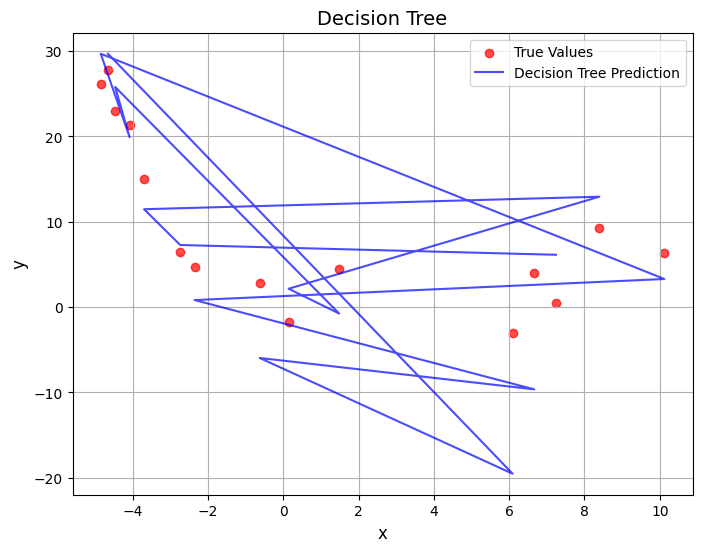

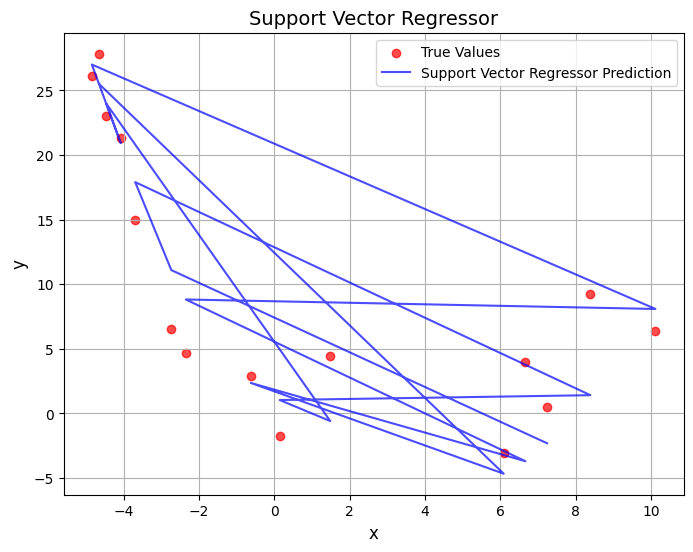

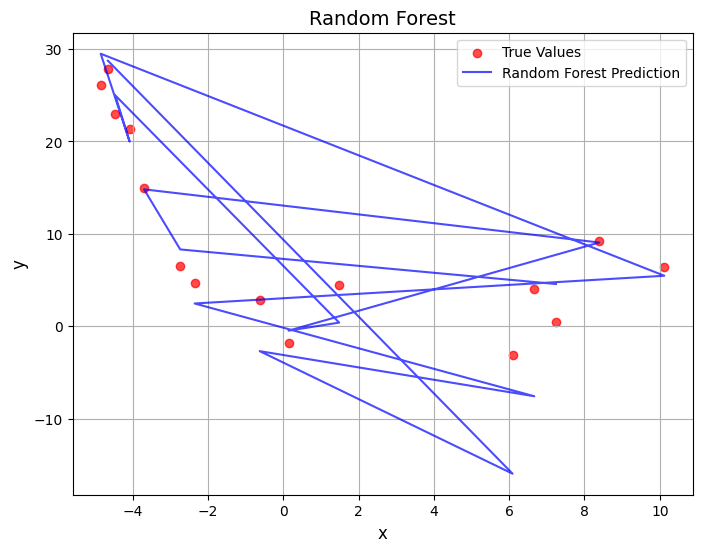

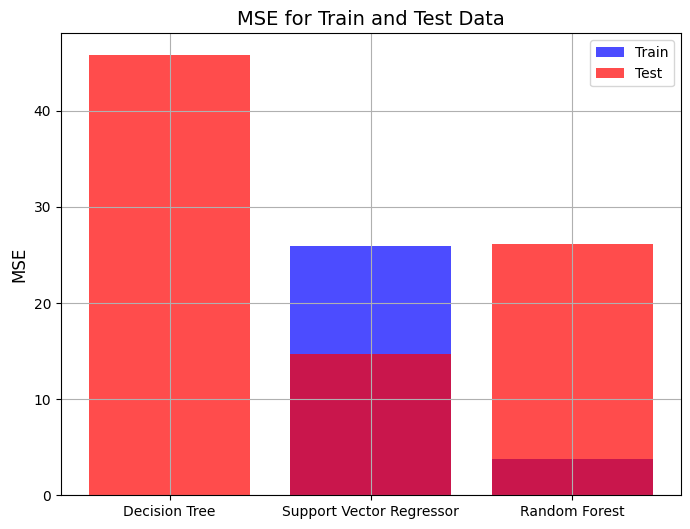

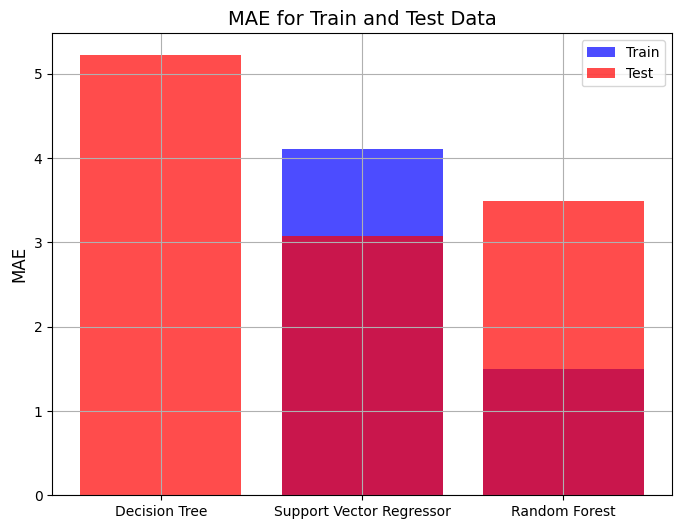

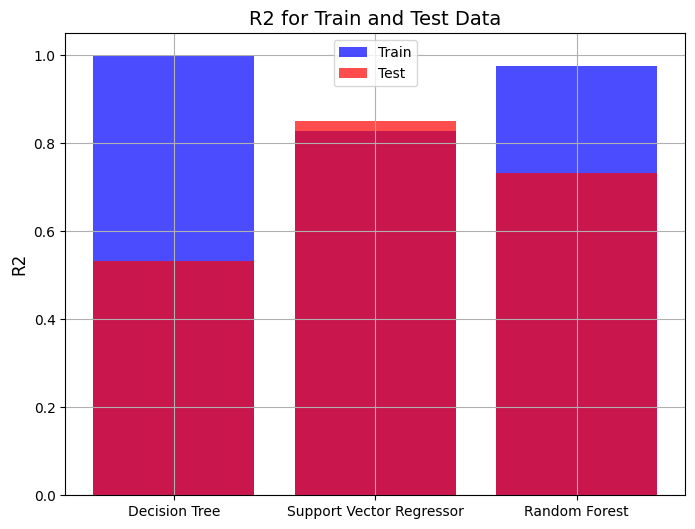

In [51]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

all_models = {
    "Decision Tree": DecisionTreeRegressor(random_state=93),
    "Support Vector Regressor": SVR(kernel='rbf', C=1.0, epsilon=0.1),
    "Random Forest": RandomForestRegressor(n_estimators=100, random_state=93),
}

metrics = {"Train": {"MSE": [], "MAE": [], "R2": []}, "Test": {"MSE": [], "MAE": [], "R2": []}}
predictions = {}

for name, model in all_models.items():
    model.fit(x_train_scaled.reshape(-1, 1), y_train_scaled)

    y_train_pred_scaled = model.predict(x_train_scaled.reshape(-1, 1))
    y_train_pred = scaler_y.inverse_transform(y_train_pred_scaled.reshape(-1, 1)).flatten()

    y_test_pred_scaled = model.predict(x_test_scaled.reshape(-1, 1))
    y_test_pred = scaler_y.inverse_transform(y_test_pred_scaled.reshape(-1, 1)).flatten()

    predictions[name] = y_test_pred

    train_mse = mean_squared_error(y_train, y_train_pred)
    train_mae = mean_absolute_error(y_train, y_train_pred)
    train_r2 = r2_score(y_train, y_train_pred)

    test_mse = mean_squared_error(y_test, y_test_pred)
    test_mae = mean_absolute_error(y_test, y_test_pred)
    test_r2 = r2_score(y_test, y_test_pred)

    metrics["Train"]["MSE"].append(train_mse)
    metrics["Train"]["MAE"].append(train_mae)
    metrics["Train"]["R2"].append(train_r2)

    metrics["Test"]["MSE"].append(test_mse)
    metrics["Test"]["MAE"].append(test_mae)
    metrics["Test"]["R2"].append(test_r2)

    print(f"{name}:")
    print(f"  Train - MSE: {train_mse}, MAE: {train_mae}, R2: {train_r2}")
    print(f"  Test - MSE: {test_mse}, MAE: {test_mae}, R2: {test_r2}\n")

for i, (name, y_pred) in enumerate(predictions.items(), 1):
    plt.figure(figsize=(8, 6))
    plt.scatter(x_test, y_test, color='red', label='True Values', alpha=0.7)
    plt.plot(x_test, y_pred, label=f'{name} Prediction', alpha=0.7, color='blue')
    plt.title(f"{name}", fontsize=14)
    plt.xlabel("x", fontsize=12)
    plt.ylabel("y", fontsize=12)
    plt.legend()
    plt.grid(True)
    plt.show()

for i, criterion in enumerate(["MSE", "MAE", "R2"]):
    plt.figure(figsize=(8, 6))
    plt.bar(all_models.keys(), metrics["Train"][criterion], color="blue", alpha=0.7, label="Train")
    plt.bar(all_models.keys(), metrics["Test"][criterion], color="red", alpha=0.7, label="Test")
    plt.title(f"{criterion} for Train and Test Data", fontsize=14)
    plt.ylabel(criterion, fontsize=12)
    plt.legend()
    plt.grid(True)
    plt.show()


Degree 1: Train MSE = 149.6424, Test MSE = 111.5964


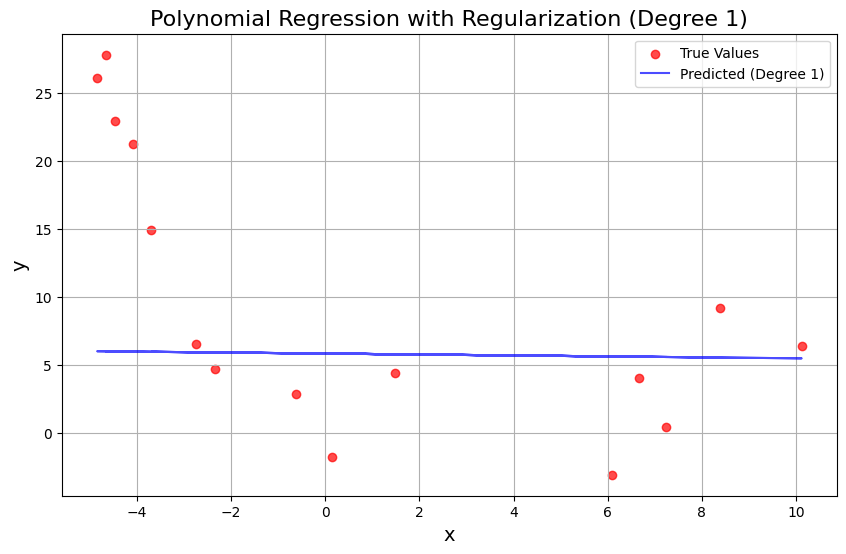

Degree 2: Train MSE = 133.6951, Test MSE = 98.0271


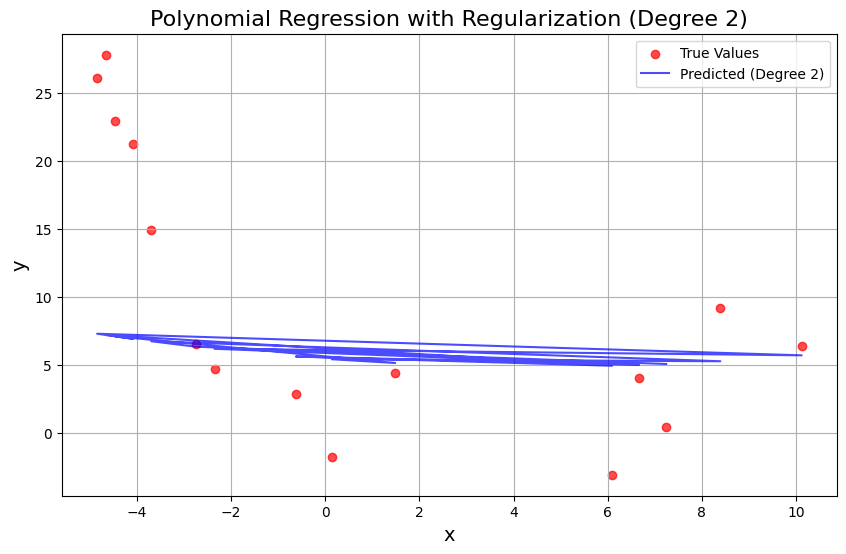

Degree 3: Train MSE = 128.0457, Test MSE = 82.8507


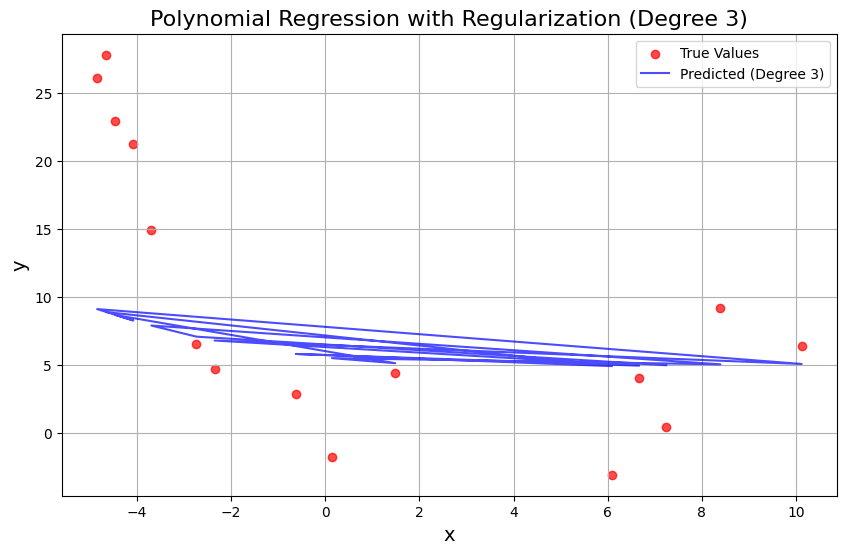

Degree 4: Train MSE = 69.5375, Test MSE = 41.7448


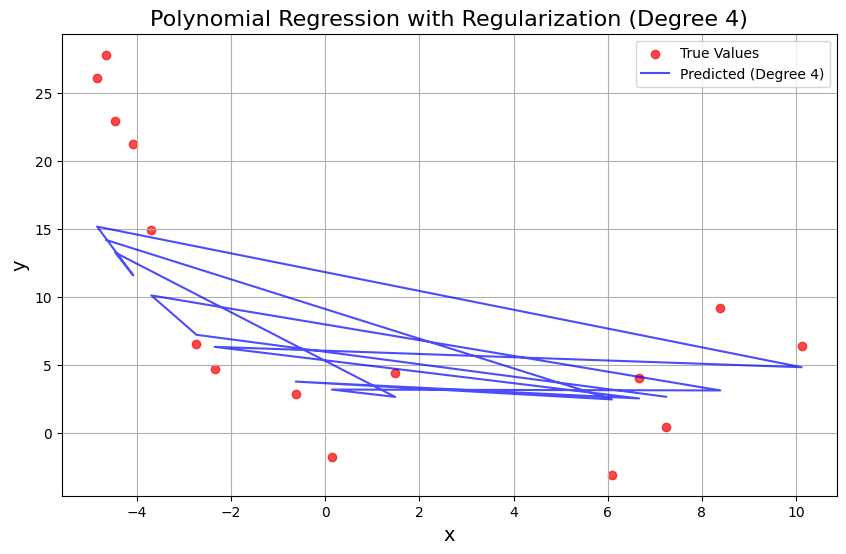

Degree 5: Train MSE = 66.2611, Test MSE = 29.5853


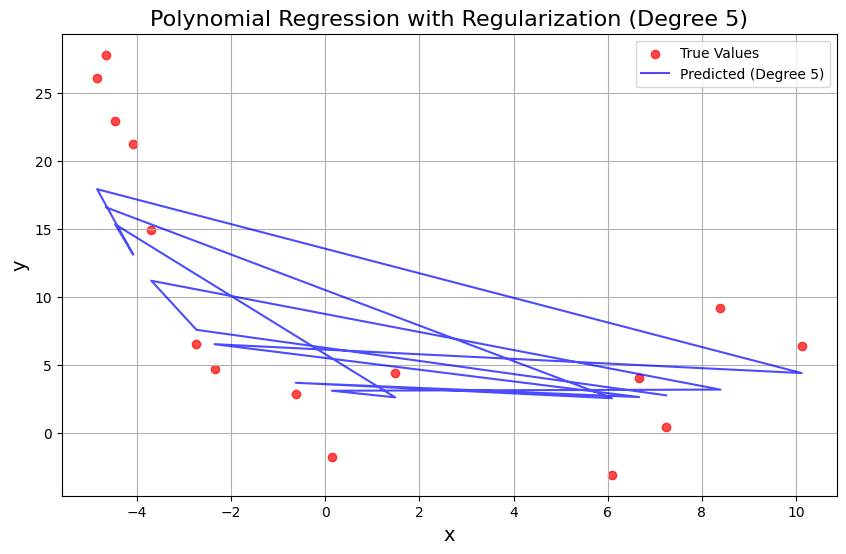

Degree 6: Train MSE = 38.2104, Test MSE = 21.5599


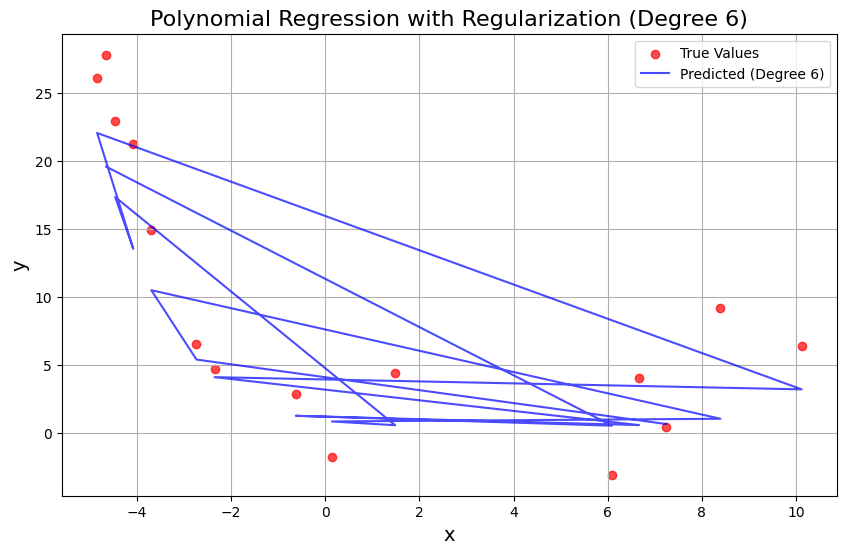

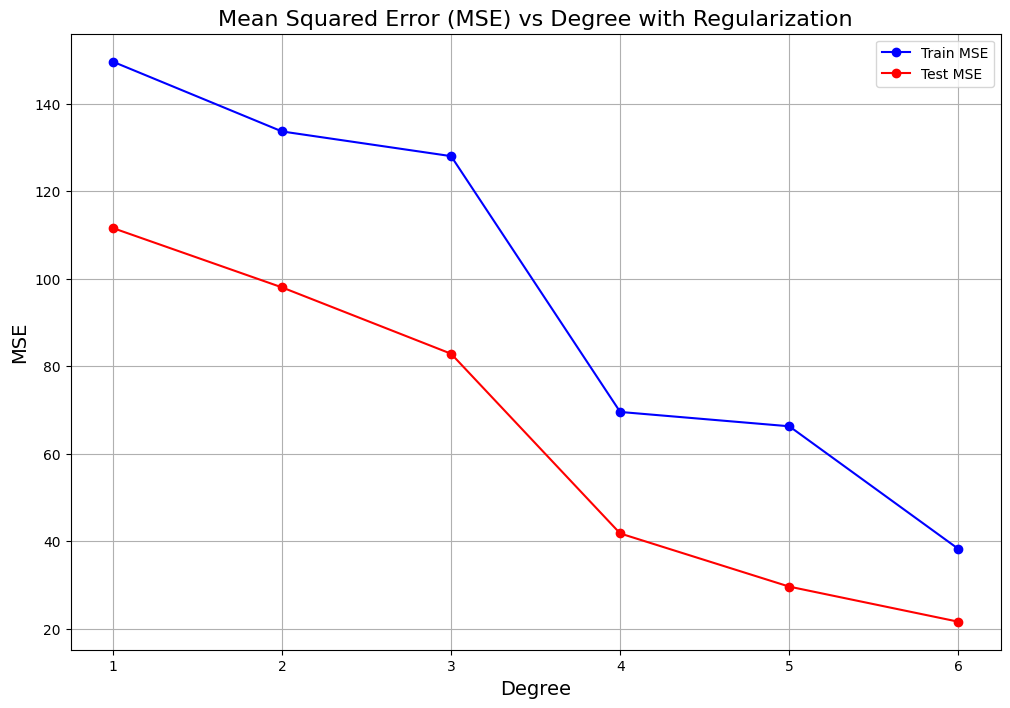

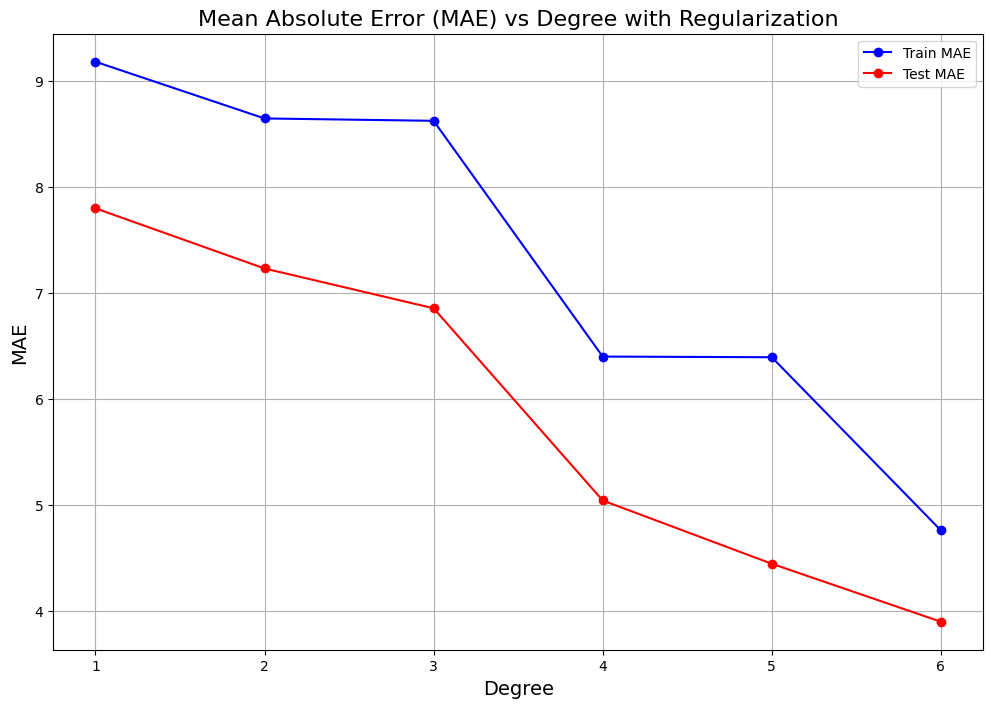

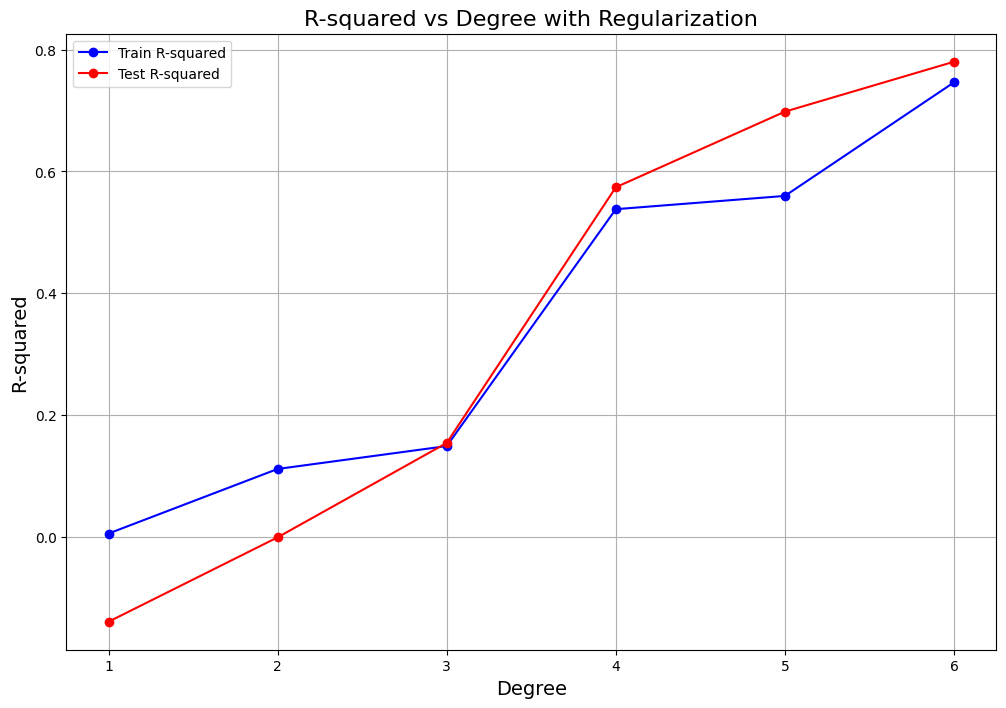

In [57]:
max_degree = 6
lambda_param = 1000

train_mse_list = []
test_mse_list = []
train_mae_list = []
test_mae_list = []
train_r2_list = []
test_r2_list = []

for degree in range(1, max_degree + 1):
    X_poly_train = np.column_stack([x_train_scaled ** i for i in range(1, degree + 1)])
    X_poly_test = np.column_stack([x_test_scaled ** i for i in range(1, degree + 1)])

    X_mean = np.mean(X_poly_train, axis=0)
    Y_mean = np.mean(y_train_scaled)
    X_centered = X_poly_train - X_mean
    Y_centered = y_train_scaled - Y_mean

    regularization_term = lambda_param * np.eye(X_poly_train.shape[1])
    w = np.linalg.inv(X_centered.T @ X_centered + regularization_term) @ X_centered.T @ Y_centered
    b = Y_mean - np.sum(w * X_mean)

    y_train_pred_scaled = X_poly_train @ w + b
    y_test_pred_scaled = X_poly_test @ w + b
    y_train_pred = scaler_y.inverse_transform(y_train_pred_scaled.reshape(-1, 1)).flatten()
    y_test_pred = scaler_y.inverse_transform(y_test_pred_scaled.reshape(-1, 1)).flatten()

    train_mse = mean_squared_error(y_train, y_train_pred)
    test_mse = mean_squared_error(y_test, y_test_pred)
    train_mae = mean_absolute_error(y_train, y_train_pred)
    test_mae = mean_absolute_error(y_test, y_test_pred)
    train_r2 = r2_score(y_train, y_train_pred)
    test_r2 = r2_score(y_test, y_test_pred)

    train_mse_list.append(train_mse)
    test_mse_list.append(test_mse)
    train_mae_list.append(train_mae)
    test_mae_list.append(test_mae)
    train_r2_list.append(train_r2)
    test_r2_list.append(test_r2)

    print(f"Degree {degree}: Train MSE = {train_mse:.4f}, Test MSE = {test_mse:.4f}")

    plt.figure(figsize=(10, 6))
    plt.scatter(x_test, y_test, color='red', label='True Values', alpha=0.7)
    plt.plot(x_test, y_test_pred, label=f'Predicted (Degree {degree})', color='blue', alpha=0.7)
    plt.title(f'Polynomial Regression with Regularization (Degree {degree})', fontsize=16)
    plt.xlabel("x", fontsize=14)
    plt.ylabel("y", fontsize=14)
    plt.legend()
    plt.grid(True)
    plt.show()

degrees = list(range(1, max_degree + 1))

plt.figure(figsize=(12, 8))
plt.plot(degrees, train_mse_list, label='Train MSE', marker='o', color='blue')
plt.plot(degrees, test_mse_list, label='Test MSE', marker='o', color='red')
plt.title("Mean Squared Error (MSE) vs Degree with Regularization", fontsize=16)
plt.xlabel("Degree", fontsize=14)
plt.ylabel("MSE", fontsize=14)
plt.legend()
plt.grid(True)
plt.show()

plt.figure(figsize=(12, 8))
plt.plot(degrees, train_mae_list, label='Train MAE', marker='o', color='blue')
plt.plot(degrees, test_mae_list, label='Test MAE', marker='o', color='red')
plt.title("Mean Absolute Error (MAE) vs Degree with Regularization", fontsize=16)
plt.xlabel("Degree", fontsize=14)
plt.ylabel("MAE", fontsize=14)
plt.legend()
plt.grid(True)
plt.show()

plt.figure(figsize=(12, 8))
plt.plot(degrees, train_r2_list, label='Train R-squared', marker='o', color='blue')
plt.plot(degrees, test_r2_list, label='Test R-squared', marker='o', color='red')
plt.title("R-squared vs Degree with Regularization", fontsize=16)
plt.xlabel("Degree", fontsize=14)
plt.ylabel("R-squared", fontsize=14)
plt.legend()
plt.grid(True)
plt.show()
